R2 Score (Random Forest): 0.997980232952618


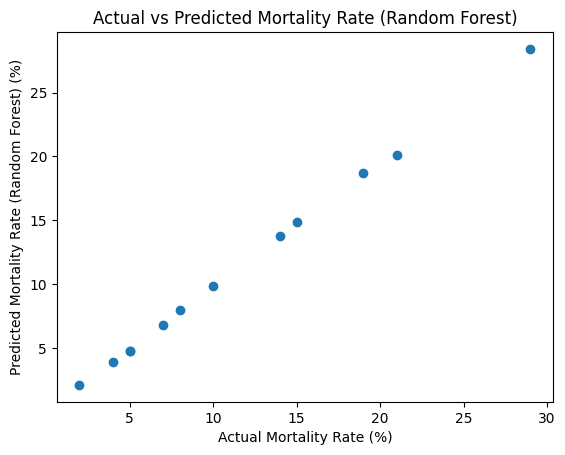

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('failure1.csv')
features = ['co']
X = data[features]
y = data['mortalityratepercent']
y = y.values.reshape(-2, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.ravel())
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'R2 Score (Random Forest): {r2_rf}')
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Mortality Rate (%)")
plt.ylabel("Predicted Mortality Rate (Random Forest) (%)")
plt.title("Actual vs Predicted Mortality Rate (Random Forest)")
plt.show()



Mean Absolute Error: 5.921189464667502e-15
Mean Squared Error: 4.3124396152081977e-29
Coefficients: [ 1.94024059e-02  1.94024059e-03  3.88048118e-04  1.94024059e-03
  3.88048118e-04  1.27976062e-17  9.69427421e-17 -8.97565934e-18
  1.94024059e-03  4.18841640e-17]
Intercept: -5.926270857586449
R2 Score: 1.0


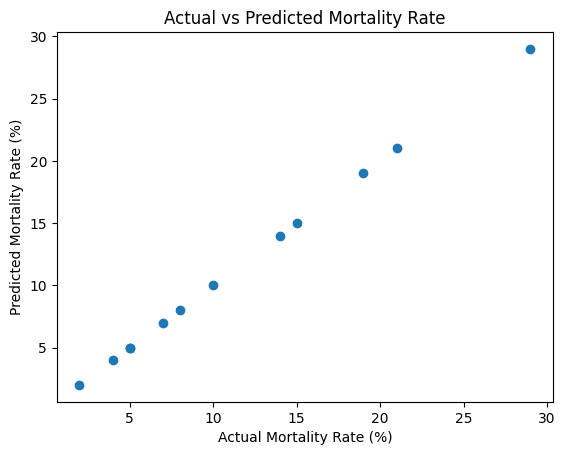

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

data = pd.read_csv('failure1.csv')

X = data[['co', 'ammonia', 'H2S', 'methane', 'temperaturecelsius', 'humiditypercent', 'totalchickcount', 'chickdaycount', 'feedkgsperday', 'averageweight']]
y = data['mortalityratepercent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')


plt.scatter(y_test, y_pred)
plt.xlabel("Actual Mortality Rate (%)")
plt.ylabel("Predicted Mortality Rate (%)")
plt.title("Actual vs Predicted Mortality Rate")
plt.show()

Accuracy: 0.83


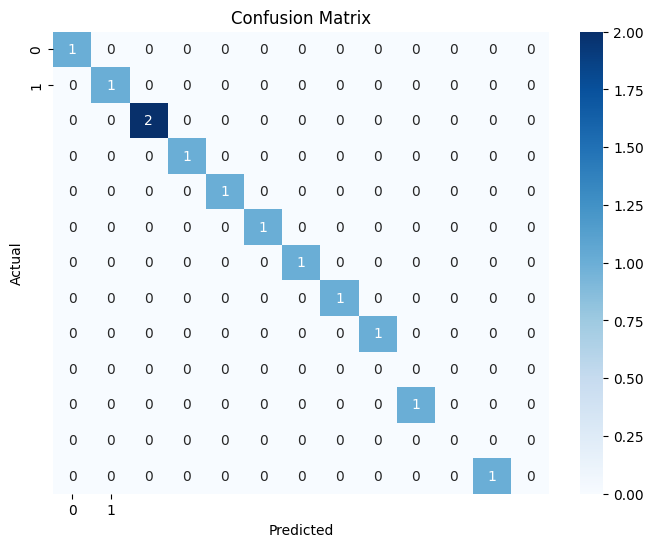

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('failure1.csv')

X = df[['co', 'ammonia', 'H2S', 'methane', 'temperaturecelsius', 'humiditypercent', 'totalchickcount', 'chickdaycount', 'feedkgsperday', 'averageweight']]
y = df['mortalityratepercent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


C:\Users\praka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\multiclass.py:84: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
C:\Users\praka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\multiclass.py:84: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(


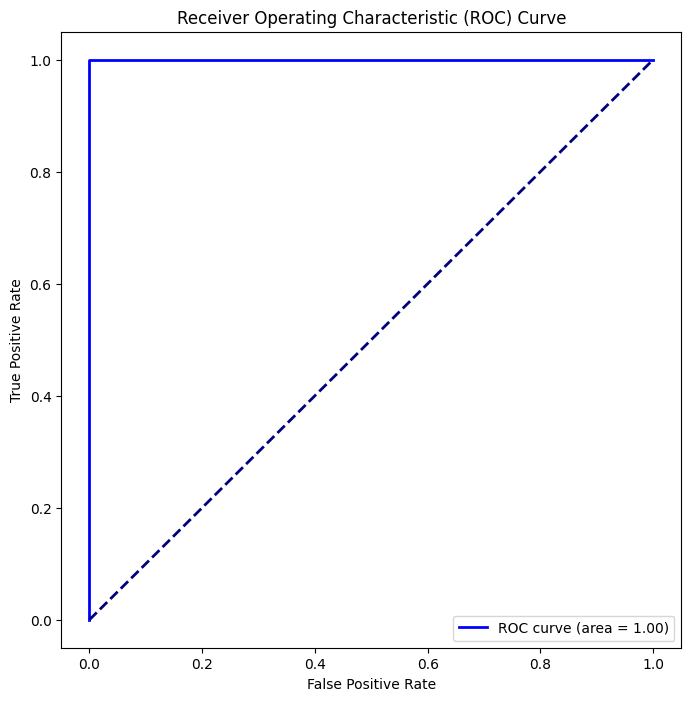

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

data = pd.read_csv('failure1.csv')
X = data.drop('mortalityratepercent', axis=1)
y = data['mortalityratepercent']

if len(y.unique()) > 1:
    y_bin = label_binarize(y, classes=list(range(10)))

    X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

    model = OneVsRestClassifier(RandomForestClassifier())
    model.fit(X_train, y_train)

    y_score = model.predict_proba(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(10):
        if len(set(y_train[:, i])) > 1 and len(set(y_test[:, i])) > 1:
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = roc_auc_score(y_test[:, i], y_score[:, i])

    plt.figure(figsize=(8, 8))
    colors = ['red', 'green', 'blue']
    for i, color in zip(range(10), colors):
        if i in roc_auc:
            plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %.2f)' % roc_auc[i])

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
else:
    print("Only one class present in the target variable. ROC AUC score is not defined in this case.")


C:\Users\praka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\multiclass.py:84: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
C:\Users\praka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\multiclass.py:84: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(


AUC for class 2: 1.0
AUC for class 4: 1.0
AUC for class 5: 1.0
AUC for class 7: 1.0
AUC for class 8: 1.0


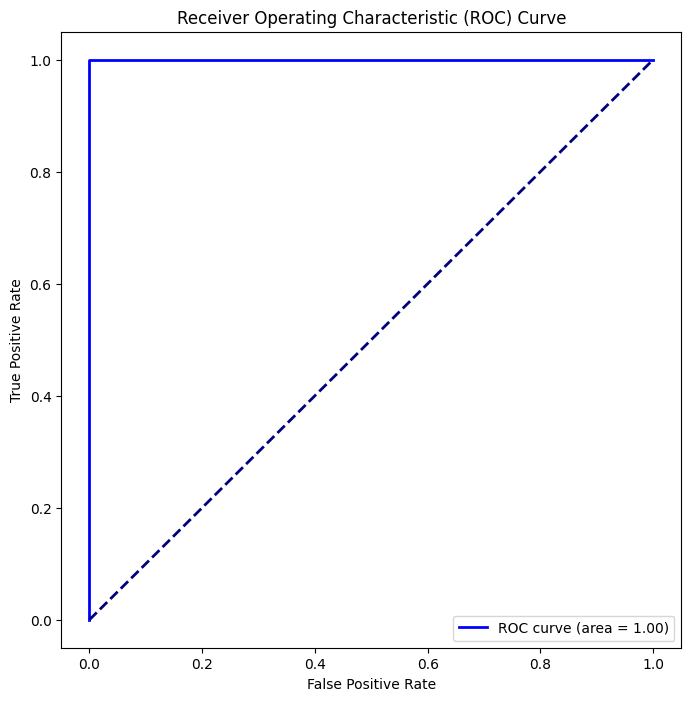

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

data = pd.read_csv('failure1.csv')
X = data.drop('mortalityratepercent', axis=1)
y = data['mortalityratepercent']

if len(y.unique()) > 1:
    y_bin = label_binarize(y, classes=list(range(10)))

    X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

    model = OneVsRestClassifier(RandomForestClassifier())
    model.fit(X_train, y_train)

    y_score = model.predict_proba(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(10):
        if len(set(y_train[:, i])) > 1 and len(set(y_test[:, i])) > 1:
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = roc_auc_score(y_test[:, i], y_score[:, i])
            print(f"AUC for class {i}: {roc_auc[i]}")

    plt.figure(figsize=(8, 8))
    colors = ['red', 'green', 'blue']
    for i, color in zip(range(10), colors):
        if i in roc_auc:
            plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
else:
    print("Only one class present in the target variable. ROC AUC score is not defined in this case.")


AUC-ROC Score (Random Forest Classifier): 1.0

Feature Importance:
co: 0.18
ammonia: 0.16
H2S: 0.1
methane: 0.11
temperaturecelsius: 0.07
humiditypercent: 0.09
totalchickcount: 0.07
chickdaycount: 0.13
feedkgsperday: 0.09


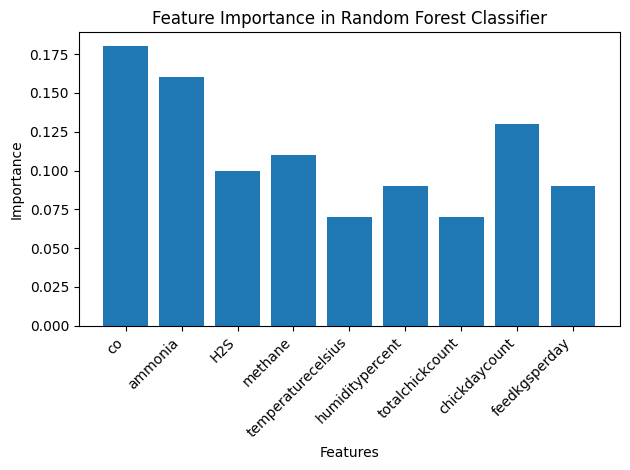

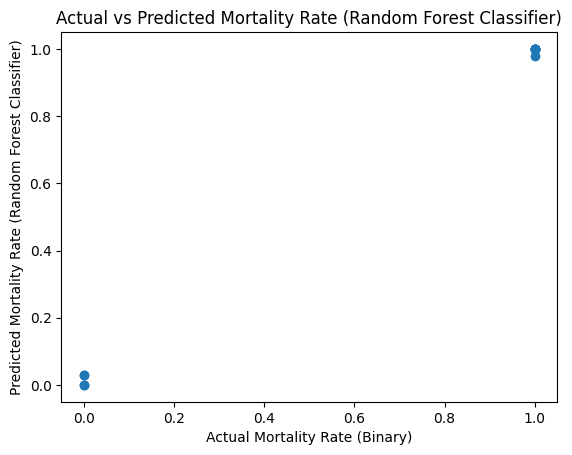

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('failure1.csv')

features = ['co', 'ammonia', 'H2S', 'methane', 'temperaturecelsius', 'humiditypercent', 'totalchickcount', 'chickdaycount', 'feedkgsperday']
X = data[features]
y = (data['mortalityratepercent'] > 5).astype(int)  # Binary classification based on a threshold (e.g., 5%)
y = y.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train.ravel())

y_pred_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]  # Probability of the positive class

auc_roc = roc_auc_score(y_test, y_pred_prob_rf)
print(f'AUC-ROC Score (Random Forest Classifier): {auc_roc}')

feature_importance = rf_classifier.feature_importances_

feature_importance_dict = dict(zip(features, feature_importance))

print("\nFeature Importance:")
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")
plt.bar(features, feature_importance)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest Classifier")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

plt.scatter(y_test, y_pred_prob_rf)
plt.xlabel("Actual Mortality Rate (Binary)")
plt.ylabel("Predicted Mortality Rate (Random Forest Classifier)")
plt.title("Actual vs Predicted Mortality Rate (Random Forest Classifier)")
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

file_path = "dataset.csv"
df = pd.read_csv(file_path)

X = df.drop(['Disease Occurrence', 'Date'], axis=1)
y = df['Disease Occurrence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", report)

temperature = float(input("Enter Temperature (°C): "))
humidity = float(input("Enter Humidity (%): "))
ammonia_level = float(input("Enter Ammonia Level (ppm): "))
ventilation_rate = float(input("Enter Ventilation Rate (cfm): "))
co2_level = float(input("Enter CO2 Level (ppm): "))
methane_level = float(input("Enter Methane Level (ppm): "))
h2s_level = float(input("Enter H2S Level (ppm): "))

new_data = pd.DataFrame({
    'Temperature (°C)': [temperature],
    'Humidity (%)': [humidity],
    'Ammonia Level (ppm)': [ammonia_level],
    'Ventilation Rate (cfm)': [ventilation_rate],
    'CO2 Level (ppm)': [co2_level],
    'Methane Level (ppm)': [methane_level],
    'H2S Level (ppm)': [h2s_level]
})

new_data.columns = X.columns

prediction = clf.predict(new_data)
print(f"\nPredicted Disease Occurrence: {prediction[0]}")


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00        18
         Yes       1.00      1.00      1.00        18

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



Enter Temperature (°C):  45
Enter Humidity (%):  56
Enter Ammonia Level (ppm):  63
Enter Ventilation Rate (cfm):  52
Enter CO2 Level (ppm):  96
Enter Methane Level (ppm):  56
Enter H2S Level (ppm):  32



Predicted Disease Occurrence: Yes


Average Precision for class 0: 0.9861556559382646
Average Precision for class 1: 0.977344772630659
Average Precision for class 2: 0.9327188689774502
Average Precision for class 3: 0.9133612914862914
Average Precision for class 4: 0.9333656539538893
Average Precision for class 5: 0.9805194805194806
Average Precision for class 6: 1.0


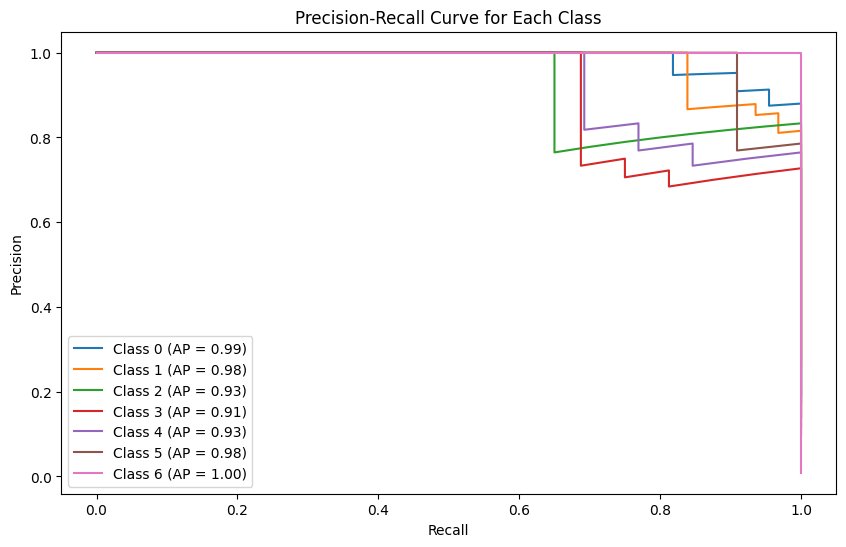

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

data = pd.read_csv('augmented_dataset.csv')  # Replace 'your_multiclass_dataset.csv' with your actual dataset file

X = data.drop('mortalityratepercent', axis=1)
y = data['mortalityratepercent']

bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_discrete = pd.cut(y, bins=bins, labels=labels, include_lowest=True)

X_train, X_test, y_train, y_test = train_test_split(X, y_discrete, test_size=0.2, random_state=42)

model = OneVsRestClassifier(RandomForestClassifier())
model.fit(X_train, y_train)

y_score = model.predict_proba(X_test)

precision = dict()
recall = dict()
average_precision = dict()

for i in range(7):  # Replace '7' with the actual number of classes
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, y_score[:, i])
    average_precision[i] = average_precision_score(y_test == i, y_score[:, i])
    print(f"Average Precision for class {i}: {average_precision[i]}")

plt.figure(figsize=(10, 6))
for i in range(7):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc

data = pd.read_csv('augmented_dataset.csv')

threshold = 10
data['mortality_binary'] = (data['mortalityratepercent'] > threshold).astype(int)

X = data.drop(['mortalityratepercent', 'mortality_binary'], axis=1)
y = data['mortality_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_scores = rf_classifier.predict_proba(X_test)[:, 1]

thresholds_per_parameter = {}
for column in X.columns:
    precision, recall, thresholds = precision_recall_curve(y_test, X_test[column])
    pr_auc = auc(recall, precision)
    best_threshold = thresholds[np.argmax(2 * (precision * recall) / (precision + recall))]  # F1 score
    thresholds_per_parameter[column] = best_threshold

for column, threshold in thresholds_per_parameter.items():
    print(f"Optimal Threshold for {column}: {threshold}")


Optimal Threshold for co: 800.02151330677
Optimal Threshold for ammonia: 49.877010197325
Optimal Threshold for H2S: 8.8585603582822
Optimal Threshold for methane: 59.798160573976
Optimal Threshold for temperaturecelsius: 32.885257780329
Optimal Threshold for humiditypercent: 42.864612421753
Optimal Threshold for totalchickcount: 799.81153751171
Optimal Threshold for chickdaycount: 32.962067303087
Optimal Threshold for feedkgsperday: 89.938440397935
Optimal Threshold for averageweight: 32.778193761079


C:\Users\Admin\AppData\Local\Temp\ipykernel_25048\1581671362.py:32: RuntimeWarning: invalid value encountered in divide
  best_threshold = thresholds[np.argmax(2 * (precision * recall) / (precision + recall))]  # F1 score
C:\Users\Admin\AppData\Local\Temp\ipykernel_25048\1581671362.py:32: RuntimeWarning: invalid value encountered in divide
  best_threshold = thresholds[np.argmax(2 * (precision * recall) / (precision + recall))]  # F1 score
C:\Users\Admin\AppData\Local\Temp\ipykernel_25048\1581671362.py:32: RuntimeWarning: invalid value encountered in divide
  best_threshold = thresholds[np.argmax(2 * (precision * recall) / (precision + recall))]  # F1 score


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('augmented_dataset.csv')

threshold = 10
data['mortality_binary'] = (data['mortalityratepercent'] > threshold).astype(int)

X = data.drop(['mortalityratepercent', 'mortality_binary'], axis=1)
y = data['mortality_binary']

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

thresholds_per_parameter = {}
for column in X.columns:
    precision, recall, thresholds = precision_recall_curve(y, X[column])
    pr_auc = auc(recall, precision)
    best_threshold = thresholds[np.argmax(2 * (precision * recall) / (precision + recall))]  # F1 score
    thresholds_per_parameter[column] = best_threshold

user_input_data = {}
for column in X.columns:
    value = float(input(f"Enter value for {column}: "))
    user_input_data[column] = [value]

user_input_df = pd.DataFrame(user_input_data)

user_prediction = rf_classifier.predict(user_input_df)
user_probability = rf_classifier.predict_proba(user_input_df)[:, 1]

for i, (pred, prob) in enumerate(zip(user_prediction, user_probability)):
    class_label = f'Class {i}'
    if pred == 1:

        abnormal_params = [param for param, threshold in thresholds_per_parameter.items() if user_input_df[param].values[0] > threshold]
        print(f"For {class_label}, Predicted: {pred}, Probability: {prob:.2f}")
        if len(abnormal_params) > 0:
            print(f"Abnormal Parameter(s): {', '.join(abnormal_params)}")
            print("Disease Predicted:Yes")
            print("Check this parameters and Please take action to reduce it")
        else:
            print("No abnormal parameters.")
    else:
        print(f"For {class_label}, Predicted: {pred}, Probability: {prob:.2f}, No abnormal parameters.")
        print("Disease Predicted:No")


NameError: name 'precision_recall_curve' is not defined

In [ ]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

file_path = "dataset.csv"
df = pd.read_csv(file_path)

X = df.drop(['Disease Occurrence', 'Date'], axis=1)
y = df['Disease Occurrence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", report)

temperature = float(input("Enter Temperature (°C): "))
humidity = float(input("Enter Humidity (%): "))
ammonia_level = float(input("Enter Ammonia Level (ppm): "))
ventilation_rate = float(input("Enter Ventilation Rate (cfm): "))
co2_level = float(input("Enter CO2 Level (ppm): "))
methane_level = float(input("Enter Methane Level (ppm): "))
h2s_level = float(input("Enter H2S Level (ppm): "))

new_data = pd.DataFrame({
    'Temperature (°C)': [temperature],
    'Humidity (%)': [humidity],
    'Ammonia Level (ppm)': [ammonia_level],
    'Ventilation Rate (cfm)': [ventilation_rate],
    'CO2 Level (ppm)': [co2_level],
    'Methane Level (ppm)': [methane_level],
    'H2S Level (ppm)': [h2s_level]
})

new_data.columns = X.columns


prediction = clf.predict(new_data)
print(f"\nPredicted Disease Occurrence: {prediction[0]}")
data = pd.read_csv('augmented_dataset.csv')

threshold = 10
data['mortality_binary'] = (data['mortalityratepercent'] > threshold).astype(int)

X = data.drop(['mortalityratepercent', 'mortality_binary'], axis=1)
y = data['mortality_binary']

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

thresholds_per_parameter = {}
for column in X.columns:
    precision, recall, thresholds = precision_recall_curve(y, X[column])
    pr_auc = auc(recall, precision)
    best_threshold = thresholds[np.argmax(2 * (precision * recall) / (precision + recall))]  # F1 score
    thresholds_per_parameter[column] = best_threshold

user_input_data = {}
for column in X.columns:
    value = float(input(f"Enter value for {column}: "))
    user_input_data[column] = [value]

user_input_df = pd.DataFrame(user_input_data)

user_prediction = rf_classifier.predict(user_input_df)
user_probability = rf_classifier.predict_proba(user_input_df)[:, 1]

for i, (pred, prob) in enumerate(zip(user_prediction, user_probability)):
    class_label = f'Class {i}'
    if pred == 1:

        abnormal_params = [param for param, threshold in thresholds_per_parameter.items() if user_input_df[param].values[0] > threshold]
        print(f"For {class_label}, Predicted: {pred}, Probability: {prob:.2f}")
        if len(abnormal_params) > 0:
            print(f"Abnormal Parameter(s): {', '.join(abnormal_params)}")

        else:
            print("No abnormal parameters.")
    else:
        print(f"For {class_label}, Predicted: {pred}, Probability: {prob:.2f}, No abnormal parameters.")

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00        18
         Yes       1.00      1.00      1.00        18

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



Enter Temperature (°C):  52
Enter Humidity (%):  63
Enter Ammonia Level (ppm):  41
Enter Ventilation Rate (cfm):  25
Enter CO2 Level (ppm):  63
Enter Methane Level (ppm):  78
Enter H2S Level (ppm):  52


C:\Users\Admin\AppData\Local\Temp\ipykernel_10404\3829088810.py:65: RuntimeWarning: invalid value encountered in divide
  best_threshold = thresholds[np.argmax(2 * (precision * recall) / (precision + recall))]  # F1 score
C:\Users\Admin\AppData\Local\Temp\ipykernel_10404\3829088810.py:65: RuntimeWarning: invalid value encountered in divide
  best_threshold = thresholds[np.argmax(2 * (precision * recall) / (precision + recall))]  # F1 score
C:\Users\Admin\AppData\Local\Temp\ipykernel_10404\3829088810.py:65: RuntimeWarning: invalid value encountered in divide
  best_threshold = thresholds[np.argmax(2 * (precision * recall) / (precision + recall))]  # F1 score



Predicted Disease Occurrence: Yes


Enter value for co:  96
Enter value for ammonia:  65
Enter value for H2S:  35
Enter value for methane:  87
Enter value for temperaturecelsius:  32
Enter value for humiditypercent:  41
Enter value for totalchickcount:  10
Enter value for chickdaycount:  10
Enter value for feedkgsperday:  42
Enter value for averageweight:  25


For Class 0, Predicted: 1, Probability: 0.55
Abnormal Parameter(s): ammonia, H2S, methane
